In [5]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [14]:
model = Sequential()

In [15]:
model.add(Embedding(input_dim = num_words, 
                    output_dim = 32, 
                    input_length = max_len))

model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(7))
model.add(Conv1D(32, 5, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer ='adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [16]:
history = model.fit(pad_X_train, y_train,
                    batch_size = 32,
                    epochs = 30,
                    validation_split = 0.2)

Epoch 1/30


625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.6390 - loss: 0.5845 - val_acc: 0.8618 - val_loss: 0.3251
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.9111 - loss: 0.2267 - val_acc: 0.8776 - val_loss: 0.3077
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.9560 - loss: 0.1295 - val_acc: 0.8720 - val_loss: 0.3474
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.9810 - loss: 0.0659 - val_acc: 0.8658 - val_loss: 0.4647
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.9958 - loss: 0.0211 - val_acc: 0.8650 - val_loss: 0.6002
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.9990 - loss: 0.0088 - val_acc: 0.8636 - val_loss: 0.6950
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.9997 - loss: 0.0020 - val_acc: 0.8674 - val_loss: 0.7418
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.9998 - loss: 0.0024 - val_acc: 0.8658 - val_loss: 0.7905
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.9999

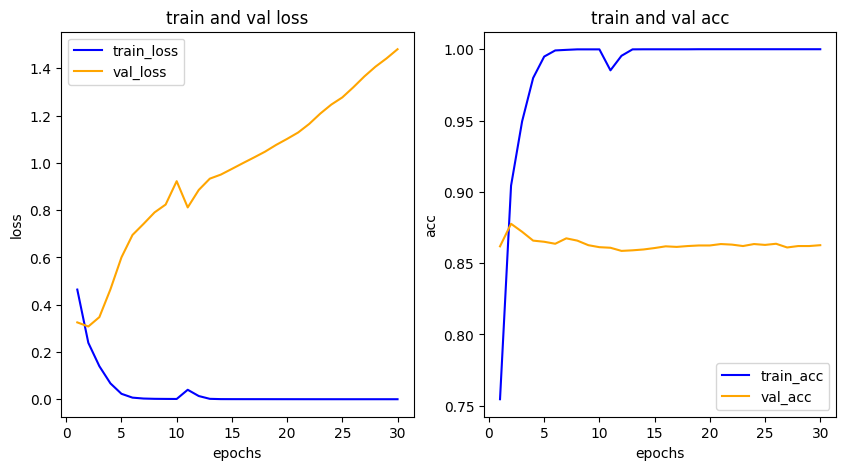

In [17]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()